In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# T-Tail HALE Model tutorial

The HALE T-Tail model intends to be a representative example of a typical HALE configuration, with high flexibility and aspect-ratio.

A geometry outline and a summary of the beam properties are given next

In [2]:
url = 'https://raw.githubusercontent.com/ImperialCollegeLondon/sharpy/dev_doc/docs/source/content/example_notebooks/images/t-tail_geometry.png'
Image(url=url, width=800)

In [3]:
url = 'https://raw.githubusercontent.com/ImperialCollegeLondon/sharpy/dev_doc/docs/source/content/example_notebooks/images/t-tail_properties.png'
Image(url=url, width=500)

This case is included in `tests/coupled/simple_HALE/`. The `generate_hale.py` file in that folder is the one that, if executed, generates all the required SHARPy files. This document is a step by step guide to how to process that case.

The T-Tail HALE model is subject to a 20% 1-cos spanwise constant gust.

First, let's start with importing SHARPy in our Python environment.

In [4]:
import sharpy
import sharpy.sharpy_main as sharpy_main

And now the `generate_HALE.py` file needs to be executed.

In [5]:
route_to_case = '../../../../sharpy/cases/coupled/simple_HALE/'
%run '../../../../sharpy/cases/coupled/simple_HALE/generate_hale.py'

There should be 3 new files, apart from the original `generate_hale.py`:

In [6]:
!ls ../../../../sharpy/cases/coupled/simple_HALE/

__init__.py         output              simple_HALE.fem.h5
generate_hale.py    simple_HALE.aero.h5 simple_HALE.sharpy


SHARPy can be run now. In the terminal, doing `cd` to the `simple_HALE` folder, the command would look like:
```
sharpy simple_HALE.sharpy
```

From a python console with `import sharpy` already run, the command is:

In [7]:
case_data = sharpy_main.main(['', route_to_case + 'simple_HALE.sharpy'])

--------------------------------------------------------------------------------
            ######  ##     ##    ###    ########  ########  ##    ##
           ##    ## ##     ##   ## ##   ##     ## ##     ##  ##  ##
           ##       ##     ##  ##   ##  ##     ## ##     ##   ####
            ######  ######### ##     ## ########  ########     ##
                 ## ##     ## ######### ##   ##   ##           ##
           ##    ## ##     ## ##     ## ##    ##  ##           ##
            ######  ##     ## ##     ## ##     ## ##           ##
--------------------------------------------------------------------------------
Aeroelastics Lab, Aeronautics Department.
    Copyright (c), Imperial College London.
    All rights reserved.
    License available at https://github.com/imperialcollegelondon/sharpy
Running SHARPy from /home/ng213/2TB/pazy_code/pazy-sharpy/lib/sharpy/docs/source/content/example_notebooks
SHARPy being run is in /home/ng213/2TB/pazy_code/pazy-sharpy/lib/sharpy
The bra

/home/ng213/2TB/pazy_code/pazy-sharpy/lib/sharpy/sharpy/aero/utils/uvlmlib.py:264: RuntimeWarning: invalid value encountered in true_divide
  flightconditions.uinf_direction = np.ctypeslib.as_ctypes(ts_info.u_ext[0][:, 0, 0]/flightconditions.uinf)
/home/ng213/2TB/pazy_code/pazy-sharpy/lib/sharpy/sharpy/aero/utils/uvlmlib.py:325: RuntimeWarning: invalid value encountered in true_divide
  flightconditions.uinf_direction = np.ctypeslib.as_ctypes(ts_info.u_ext[0][:, 0, 0]/flightconditions.uinf)


|   1   | 0.0250 |  2   |   0.660158   |   0.788767   |  -4.245993   |-9.971789e+00 |-7.504783e-01 |
|   2   | 0.0500 |  3   |   0.698975   |   0.965136   |  -4.635143   |-9.971745e+00 |-7.505379e-01 |
|   3   | 0.0750 |  2   |   0.699509   |   0.744684   |  -4.142638   |-9.971678e+00 |-7.506741e-01 |
|   4   | 0.1000 |  2   |   0.702553   |   0.742001   |  -4.583042   |-9.971654e+00 |-7.508442e-01 |
|   5   | 0.1250 |  1   |   0.705584   |   0.512845   |  -4.384776   |-9.971729e+00 |-7.509873e-01 |
|   6   | 0.1500 |  2   |   0.710967   |   0.733027   |  -4.729199   |-9.971808e+00 |-7.510934e-01 |
|   7   | 0.1750 |  1   |   0.717295   |   0.511901   |  -4.049012   |-9.971749e+00 |-7.511575e-01 |
|   8   | 0.2000 |  1   |   0.687752   |   0.519393   |  -4.147149   |-9.971609e+00 |-7.511620e-01 |
|   9   | 0.2250 |  1   |   0.657027   |   0.533608   |  -4.243231   |-9.971483e+00 |-7.511461e-01 |
|  10   | 0.2500 |  1   |   0.650443   |   0.540742   |  -4.352169   |-9.971378e+00 |-7.511

The resulting data structure that is returned from the call to `main` contains all the time-dependant variables for both the structural and aerodynamic solvers.

`timestep_info` can be found in `case_data.structure` and `case_data.aero`. It is an array with custom-made structure to contain the data of each solver.

In the `.sharpy` file, we can see which solvers are run:
```
flow = ['BeamLoader',
        'AerogridLoader',
        'StaticTrim',
        'BeamLoads',
        'AerogridPlot',
        'BeamPlot',
        'DynamicCoupled',
        ]
```

In order:

* BeamLoader: reads the `fem.h5` file and generates the structure for the beam solver.

* AerogridLoader: reads the `aero.h5` file and generates the aerodynamic grid for the aerodynamic solver.

* StaticTrim: this solver performs a longitudinal trim (Thrust, Angle of attack and Elevator deflection) using the StaticCoupled solver.

* BeamLoads: calculates the internal beam loads for the static solution

* AerogridPlot: outputs the aerodynamic grid for the static solution.

* BeamPlot: outputs the structural discretisation for the static solution.

* DynamicCoupled: is the main driver of the dynamic simulation: executes the structural and aerodynamic solvers and couples both. Every converged time step is followed by a BeamLoads, AerogridPlot and BeamPlot execution.

### Structural data organisation

The `timestep_info` structure contains several relevant variables:

* `for_pos`: position of the body-attached frame of reference in inertial FoR.

* `for_vel`: velocity (in body FoR) of the body FoR wrt inertial FoR.

* `pos`: nodal position in A FoR.

* `psi`: nodal rotations (from the material B FoR to A FoR) in a Cartesian Rotation Vector parametrisation.

* `applied_steady_forces`: nodal forces from the aero solver and the applied forces.

* `postproc_cell`: is a dictionary that contains the variables generated by a postprocessor, such as the internal beam loads.


The structural `timestep_info` also contains some useful variables:

* `cag` and `cga` return $C^{AG}$ and $C^{GA}$, the rotation matrices from the body-attached (A) FoR to the inertial (G).

* `glob_pos` rotates the `pos` variable to give you the inertial nodal position. If `include_rbm = True` is passed, `for_pos` is added to it.

### Aerodynamic data organisation

The aerodynamic datastructure can be found in `case_data.aero.timestep_info`.
It contains useful variables, such as:

* `dimensions` and `dimensions_star`: gives the dimensions of every surface and wake surface. Organised as: `dimensions[i_surf, 0] = chordwise panels`, `dimensions[i_surf, 1] = spanwise panels`.

* `zeta` and `zeta_star`: they are the $G$ FoR coordinates of the surface vertices.

* `gamma` and `gamma_star`: vortex ring circulations.

### Structural dynamics

We can now plot the rigid body dynamics:

*RBM trajectory*

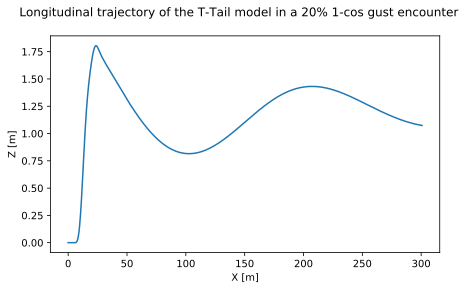

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

# extract information
n_tsteps = len(case_data.structure.timestep_info)
xz = np.zeros((n_tsteps, 2))
for it in range(n_tsteps):
    xz[it, 0] = -case_data.structure.timestep_info[it].for_pos[0] # the - is so that increasing time -> increasing x
    xz[it, 1] = case_data.structure.timestep_info[it].for_pos[2]
ax.plot(xz[:, 0], xz[:, 1])
fig.suptitle('Longitudinal trajectory of the T-Tail model in a 20% 1-cos gust encounter')
ax.set_xlabel('X [m]')
ax.set_ylabel('Z [m]');
plt.show()

*RBM velocities*

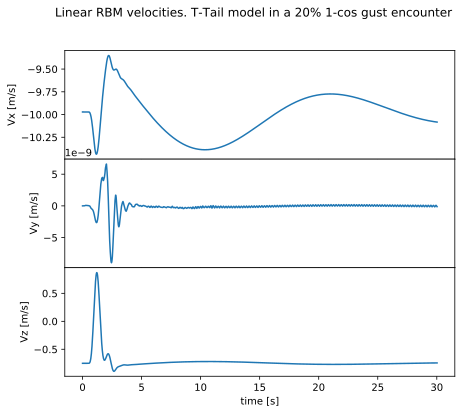

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(7, 6), sharex=True)
ylabels = ['Vx [m/s]', 'Vy [m/s]', 'Vz [m/s]']

# extract information
n_tsteps = len(case_data.structure.timestep_info)
dt = case_data.settings['DynamicCoupled']['dt']
time_vec = np.linspace(0, n_tsteps*dt, n_tsteps)
for_vel = np.zeros((n_tsteps, 3))
for it in range(n_tsteps):
    for_vel[it, 0:3] = case_data.structure.timestep_info[it].for_vel[0:3]
    
for idim in range(3):
    ax[idim].plot(time_vec, for_vel[:, idim])
    ax[idim].set_ylabel(ylabels[idim])
    
ax[2].set_xlabel('time [s]')
plt.subplots_adjust(hspace=0)
fig.suptitle('Linear RBM velocities. T-Tail model in a 20% 1-cos gust encounter');
# ax.set_xlabel('X [m]')
# ax.set_ylabel('Z [m]');
plt.show()

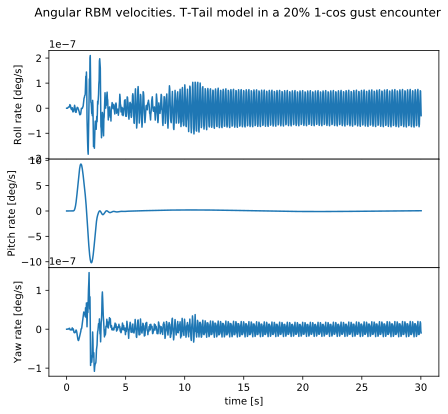

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(7, 6), sharex=True)
ylabels = ['Roll rate [deg/s]', 'Pitch rate [deg/s]', 'Yaw rate [deg/s]']

# extract information
n_tsteps = len(case_data.structure.timestep_info)
dt = case_data.settings['DynamicCoupled']['dt']
time_vec = np.linspace(0, n_tsteps*dt, n_tsteps)
for_vel = np.zeros((n_tsteps, 3))
for it in range(n_tsteps):
    for_vel[it, 0:3] = case_data.structure.timestep_info[it].for_vel[3:6]*180/np.pi
    
for idim in range(3):
    ax[idim].plot(time_vec, for_vel[:, idim])
    ax[idim].set_ylabel(ylabels[idim])
    
ax[2].set_xlabel('time [s]')
plt.subplots_adjust(hspace=0)
fig.suptitle('Angular RBM velocities. T-Tail model in a 20% 1-cos gust encounter');
# ax.set_xlabel('X [m]')
# ax.set_ylabel('Z [m]');
plt.show()

*Wing tip deformation*

It is stored in `timestep_info` as `pos`. We need to find the correct node.

Wing tip node is the maximum Y one:  16


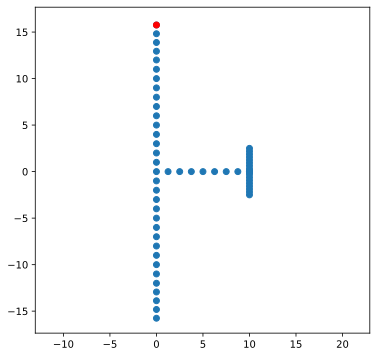

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(case_data.structure.ini_info.pos[:, 0], case_data.structure.ini_info.pos[:, 1])
ax.axis('equal')
tip_node = np.argmax(case_data.structure.ini_info.pos[:, 1])
print('Wing tip node is the maximum Y one: ', tip_node)
ax.scatter(case_data.structure.ini_info.pos[tip_node, 0], case_data.structure.ini_info.pos[tip_node, 1], color='red')
plt.show()

We can plot now the `pos[tip_node,:]` variable:

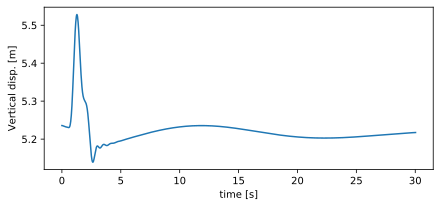

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))

# extract information
n_tsteps = len(case_data.structure.timestep_info)
xz = np.zeros((n_tsteps, 2))
for it in range(n_tsteps):
    xz[it, 0] = case_data.structure.timestep_info[it].pos[tip_node, 0]
    xz[it, 1] = case_data.structure.timestep_info[it].pos[tip_node, 2]
ax.plot(time_vec, xz[:, 1])
# fig.suptitle('Longitudinal trajectory of the T-Tail model in a 20% 1-cos gust encounter')
ax.set_xlabel('time [s]')
ax.set_ylabel('Vertical disp. [m]');
plt.show()

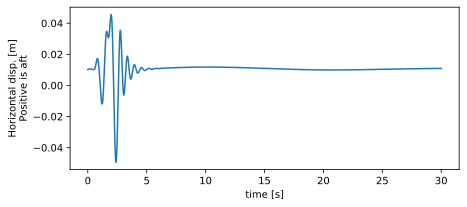

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))

# extract information
n_tsteps = len(case_data.structure.timestep_info)
xz = np.zeros((n_tsteps, 2))
for it in range(n_tsteps):
    xz[it, 0] = case_data.structure.timestep_info[it].pos[tip_node, 0]
    xz[it, 1] = case_data.structure.timestep_info[it].pos[tip_node, 2]
ax.plot(time_vec, xz[:, 0])
# fig.suptitle('Longitudinal trajectory of the T-Tail model in a 20% 1-cos gust encounter')
ax.set_xlabel('time [s]')
ax.set_ylabel('Horizontal disp. [m]\nPositive is aft');
plt.show()

*Wing root loads*

The wing root loads can be extracted from the `postproc_cell` structure in `timestep_info`.

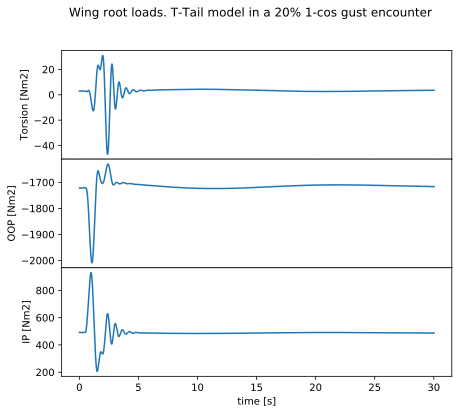

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(7, 6), sharex=True)
ylabels = ['Torsion [Nm2]', 'OOP [Nm2]', 'IP [Nm2]']

# extract information
n_tsteps = len(case_data.structure.timestep_info)
dt = case_data.settings['DynamicCoupled']['dt']
time_vec = np.linspace(0, n_tsteps*dt, n_tsteps)
loads = np.zeros((n_tsteps, 3))
for it in range(n_tsteps):
    loads[it, 0:3] = case_data.structure.timestep_info[it].postproc_cell['loads'][0, 3:6]
    
for idim in range(3):
    ax[idim].plot(time_vec, loads[:, idim])
    ax[idim].set_ylabel(ylabels[idim])
    
ax[2].set_xlabel('time [s]')
plt.subplots_adjust(hspace=0)
fig.suptitle('Wing root loads. T-Tail model in a 20% 1-cos gust encounter');
# ax.set_xlabel('X [m]')
# ax.set_ylabel('Z [m]');
plt.show()

## Aerodynamic analysis

The aerodynamic analysis can be obviously conducted using python. However, the easiest way is to run the case by yourself and open the files in `output/simple_HALE/beam` and `output/simple_HALE/aero` with [Paraview](https://www.paraview.org/).

In [18]:
url = 'https://raw.githubusercontent.com/ImperialCollegeLondon/sharpy/dev_doc/docs/source/content/example_notebooks/images/t-tail_solution.png'
Image(url=url, width=600)